In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
#Imports and libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sn

In [39]:
#Rescaling my training dataset
training = ImageDataGenerator(rescale = 1/255)

In [40]:
#Traning dataset directory and resizing
training_dataset = training.flow_from_directory("/content/drive/MyDrive/SignatureDataSet/training", target_size = (200 , 200), batch_size = 10, class_mode = 'binary')

Found 1920 images belonging to 2 classes.


In [41]:
#0 for forged and 1 for genuine
training_dataset.class_indices

{'forged': 0, 'genuine': 1}

In [49]:
#My model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
]   
)

In [50]:
#Compile my model and I used RMSprop as my optimizer with lr of 0.001
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [51]:
#Fitting my model
model_fit = model.fit(training_dataset, steps_per_epoch=3, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 348ms/step - loss: 26.6375 - accuracy: 0.4000
Epoch 2/30
3/3 [==============================] - 1s 377ms/step - loss: 2.3956 - accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - 1s 346ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 1s 397ms/step - loss: 0.8707 - accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 1s 348ms/step - loss: 0.7845 - accuracy: 0.4667
Epoch 6/30
3/3 [==============================] - 2s 351ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 1s 347ms/step - loss: 0.6639 - accuracy: 0.6000
Epoch 8/30
3/3 [==============================] - 1s 354ms/step - loss: 0.7320 - accuracy: 0.4000
Epoch 9/30
3/3 [==============================] - 1s 364ms/step - loss: 0.9113 - accuracy: 0.6333
Epoch 10/30
3/3 [==============================] - 1s 365ms/step - loss: 0.6697 - accuracy: 0.5000
Epoch 11/30
3/3 [=

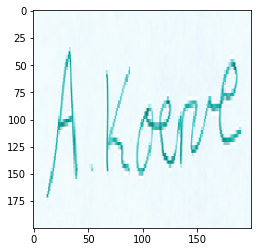

Forged!


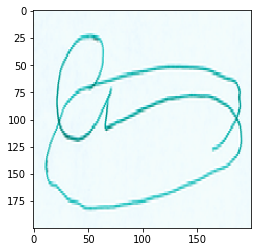

Forged!


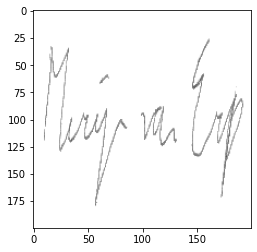

Genuine!


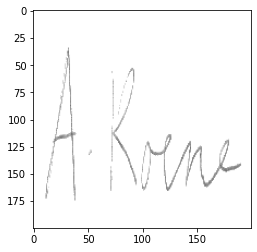

Genuine!


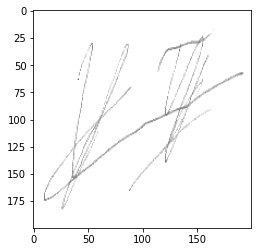

Genuine!


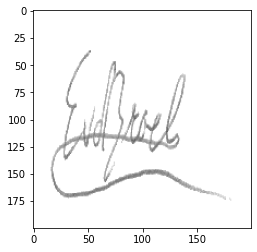

Genuine!


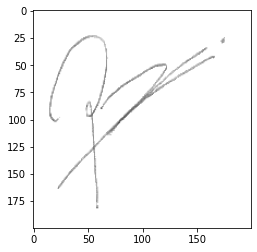

Genuine!


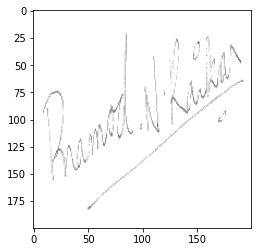

Genuine!


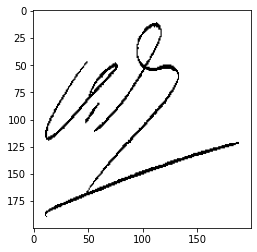

Forged!


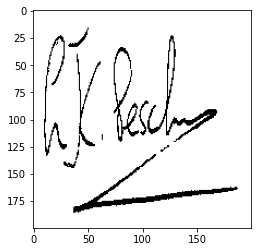

Forged!


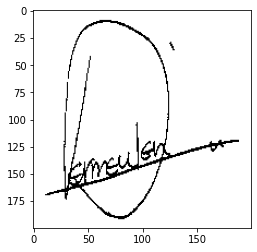

Genuine!


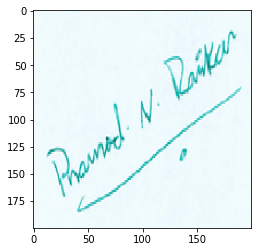

Genuine!


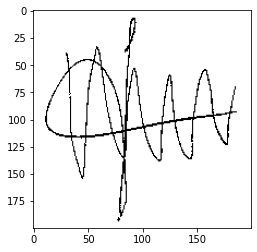

Forged!


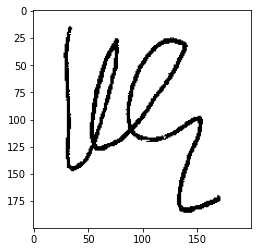

Forged!


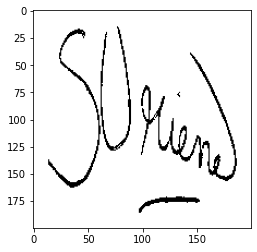

Forged!


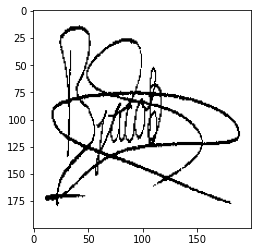

Forged!


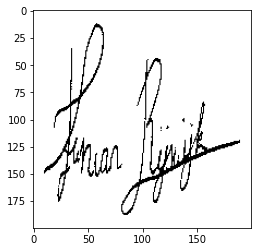

Genuine!


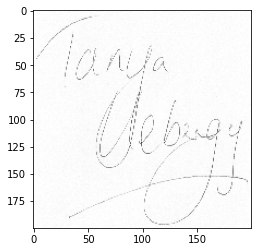

Genuine!


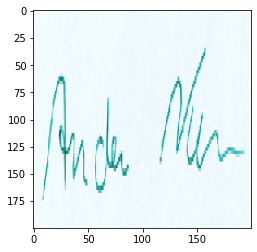

Genuine!


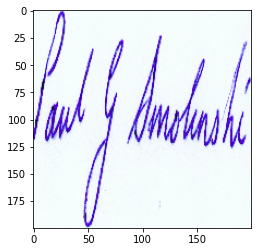

Genuine!


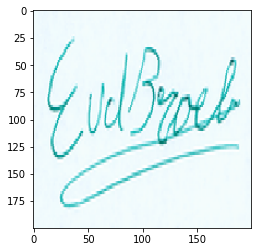

Forged!


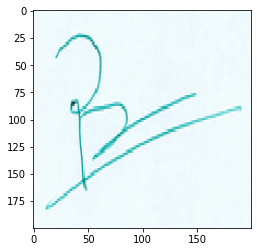

Forged!


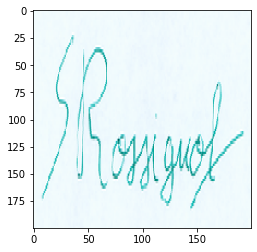

Genuine!


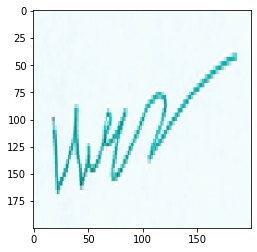

Genuine!


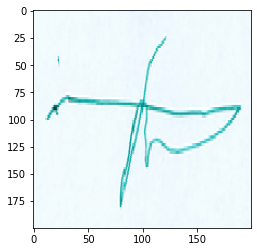

Forged!


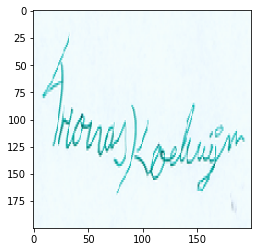

Forged!


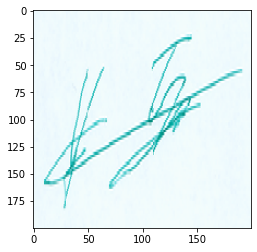

Genuine!


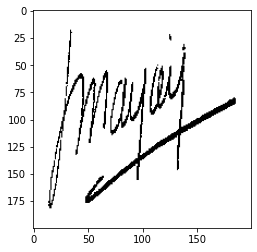

Forged!


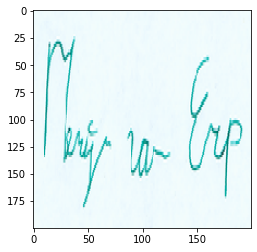

Genuine!


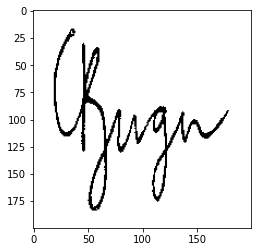

Forged!

Forged: 14 , Genuine: 16


In [52]:
#Testing prediction
#Forged Test
test_forged_dir = "/content/drive/MyDrive/SignatureDataSet/testing/forged"

countForged1 = 0
countGenuine1 = 0
predictionList = []

for x in os.listdir(test_forged_dir):
  img = image.load_img(test_forged_dir + '//' + x , target_size=(200,200))
  plt.imshow(img)
  plt.show()

  Y = image.img_to_array(img)
  Y = np.expand_dims(Y,axis=0)
  forged_img = np.vstack([Y])
  forgedOrGenuine = model.predict(forged_img)
  if forgedOrGenuine == 0:
    print("Forged!")
    countForged1 = countForged1 + 1;
    predictionList.append(0)
  else:
    print("Genuine!")
    countGenuine1 = countGenuine1 + 1;
    predictionList.append(1)

print("")
print("Forged: " + str(countForged1) + " , Genuine: " + str(countGenuine1))


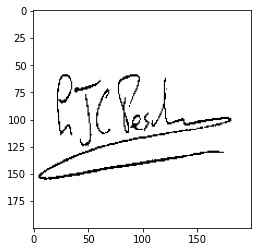

Forged!


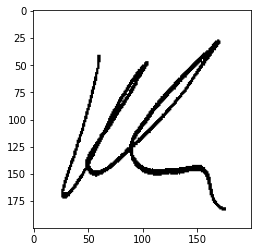

Forged!


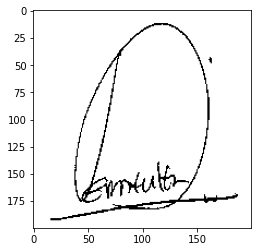

Genuine!


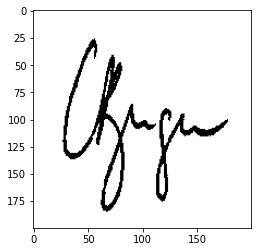

Forged!


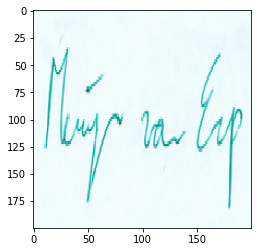

Genuine!


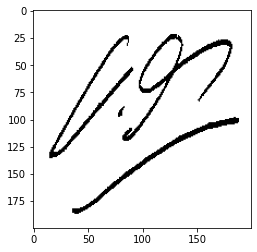

Forged!


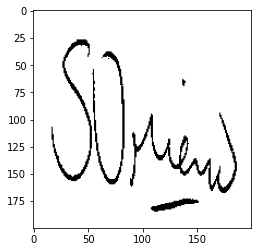

Genuine!


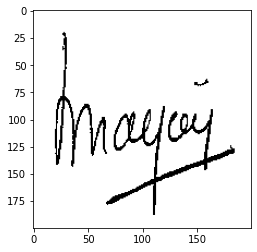

Genuine!


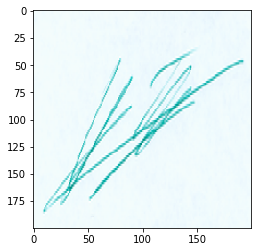

Genuine!


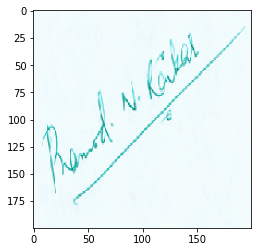

Genuine!


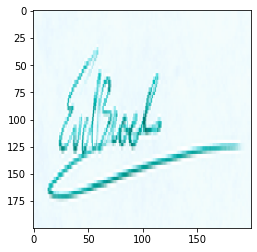

Genuine!


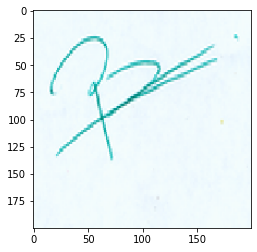

Forged!


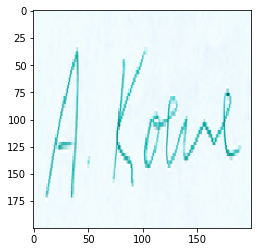

Forged!


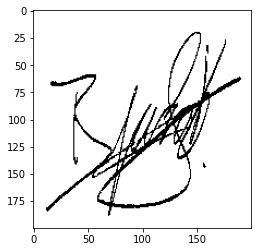

Genuine!


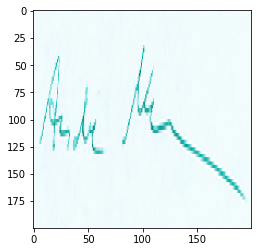

Genuine!


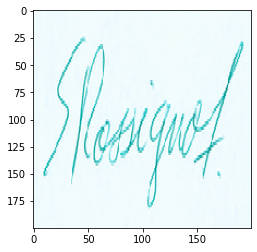

Forged!


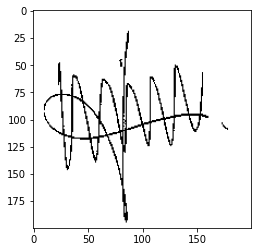

Forged!


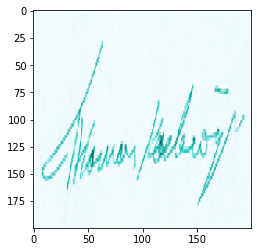

Genuine!


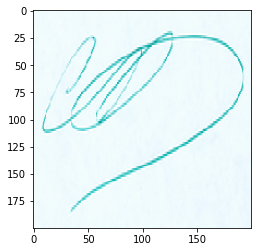

Forged!


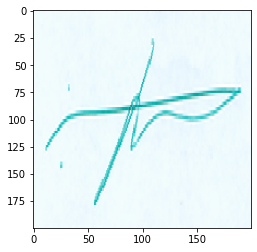

Forged!


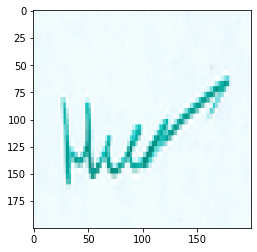

Genuine!


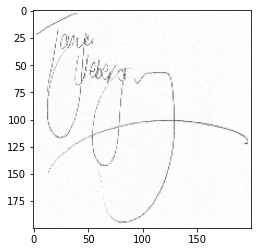

Genuine!


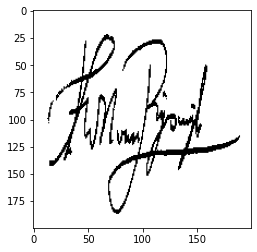

Forged!


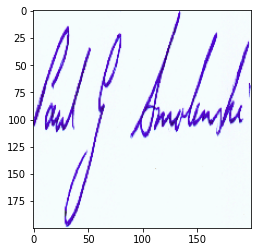

Genuine!


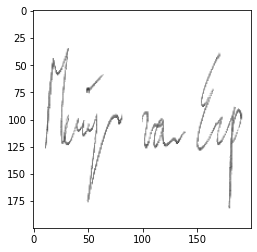

Genuine!


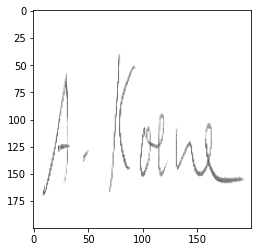

Genuine!


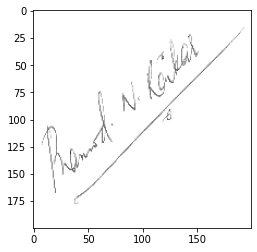

Genuine!


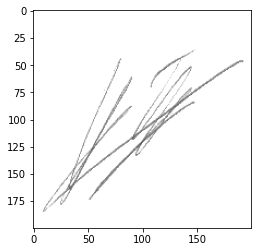

Genuine!


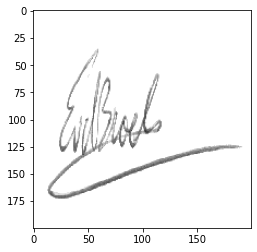

Genuine!


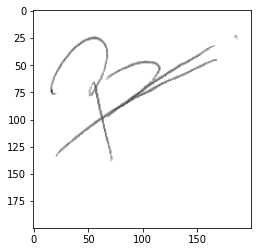

Forged!

Forged: 12 , Genuine: 18


In [53]:
#Testing prediction
#Genuine Test
test_forged_dir = "/content/drive/MyDrive/SignatureDataSet/testing/genuine"

countForged2 = 0
countGenuine2 = 0

for x in os.listdir(test_forged_dir):
  img = image.load_img(test_forged_dir + '//' + x , target_size=(200,200))
  plt.imshow(img)
  plt.show()

  Y = image.img_to_array(img)
  Y = np.expand_dims(Y,axis=0)
  forged_img = np.vstack([Y])
  forgedOrGenuine = model.predict(forged_img)
  if forgedOrGenuine == 0:
    print("Forged!")
    countForged2 = countForged2 + 1;
    predictionList.append(0)
  else:
    print("Genuine!")
    countGenuine2 = countGenuine2 + 1;
    predictionList.append(1)

print("")
print("Forged: " + str(countForged2) + " , Genuine: " + str(countGenuine2))


In [54]:
#Test accuracy of all 60 test images combined
correct = countForged1 + countGenuine2
testAccuracy = correct/60*100
print("Test Accuracy: " + str(testAccuracy))

Test Accuracy: 53.333333333333336


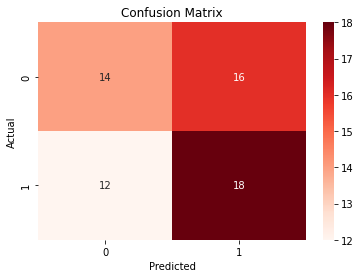

In [55]:
#Populate test results as a heatmap
cm = {'Actual': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'Predicted': predictionList
        }

df = pd.DataFrame(cm, columns=['Actual','Predicted'])
confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, cmap='Reds')
plt.title("Confusion Matrix")
plt.show()